# ELECTRIC MOPEDS

## Task 1 


**Data Importation and Processing**

In [1]:
import pandas as pd
import numpy as np
datasett = pd.read_csv('electric_bike_ratings_2212.csv')
#dataset.head()
dataset = datasett.copy()

The import statement is used to import libraries that will be needed in the validating and analyzing data.
A copy of the original dataset is also made for better flexibility.

In [2]:
dataset['overall_rating'].dtypes

dtype('float64')

The datatype of the overall_rating is checked for verification.

In [3]:
dataset['owned'].dtypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB


The above is done to check if there are missing values in any of the feature columns and to check their data type meets the required type

In [4]:
#Does not meet the nominal tag
dataset['owned'].dtypes 
#Has no missing values
dataset['owned'].isna().sum()
#used 'astype' to change to categorical to meet the nominal tag
dataset['owned'] = dataset['owned'].astype('category')

This is done to convert the 'owned' feature column to the required datatype

In [5]:
#Does not meet the nominal tag
dataset['make_model'].dtypes
#Has no missing values
dataset['make_model'].isna().sum()
#Used 'astype' to convert to categorical to meet the nominal tag
dataset['make_model'] = dataset['make_model'].astype('category')

This is done to convert the 'make_model' feature column to the required datatype (categorical-nominal)

In [6]:
#Does not meet the nominal tag, also doesn't meet the 'English short format'
dataset['review_month'].dtypes
#Has no missing values
dataset['review_month'].isna().sum()
#used 'str' to extract only the required part of the values and 
#used 'astype' to change to categorical to meet the nominal tag
dataset['review_month'] = dataset['review_month'].str[-3:]
dataset['review_month'] = dataset['review_month'].astype('category')
#confirm values
dataset['review_month'].unique()

['Oct', 'Jun', 'Nov', 'Sep', 'Aug', ..., 'Apr', 'Dec', 'Feb', 'Jan', 'May']
Length: 12
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']

This is done to convert the 'review_month' feature column to the required datatype (categorical-nominal).

Since the values are to be in English short format (Jan,Feb, Mar, Apr etc.), the last three characters of each value in the column are extracted.

The 'review_month' feature is set to the extracted form.

In [7]:
#Does not meet the nominal tag,had missing value('nan')
dataset['web_browser'].dtypes
# 150 missing value('nan')
dataset['web_browser'].isna().sum()
#used 'replace' to change 'nan' to 'unknown'. Also converted to categorical (nominal)
dataset['web_browser'] = dataset['web_browser'].replace(np.nan, 'unknown')
dataset['web_browser'] = dataset['web_browser'].astype('category')

The 'web_browser' column contains missing values( nan), the above step replaces all missing values(nan) with 'unknown' using the replace() method.

The datatype of the column is changed to a categorical format.

In [8]:
#Does not meet discrete tag
dataset['reviewer_age'].dtypes
#Has no missing value but does have '-' which is not acceptable value
#replaced '-' with '0'(a placeholder) to make conversion to integer with error
dataset['reviewer_age'] = dataset['reviewer_age'].replace('-','0')
#conversion to integer
dataset['reviewer_age'] = dataset['reviewer_age'].astype(int)
#replace '0' with average age as required
dataset['reviewer_age'] = dataset['reviewer_age'].replace(0,dataset['reviewer_age'].mean())
#conversion to integer(discrete)
dataset['reviewer_age'] = dataset['reviewer_age'].astype(int)
#confirmation of changes
dataset['reviewer_age'].unique()

array([23, 24, 28, 41, 33, 47, 20, 32, 35, 22, 29, 39, 42, 36, 40, 27, 48,
       34, 16, 21, 25, 30, 46, 37, 31, 17, 44, 26, 38, 49, 50, 45, 19, 43,
       18])

The 'reviewer_age' column has no missing value however, one of the values is a '-' instead of an age, to fix this the following steps were follwed;
- Since the column is an object data type, the incorrect value(-) can not be replaced with the mean of the column using the replace method. 
- The column data type can not be changed to 'int ' datatype directly using the astype method as there will be error when '-' is tried to be converted into 'int'. 
- To avoid this error, the '-' value was first replaced with '0'. both are of object type so no error. 
- Then the column is converted to 'int' datatype. 
- Then the '0' value is replaced with the mean of the colum.

In [9]:
#does not meet nominal tag
dataset['primary_use'].dtypes
#has no missing values
dataset['primary_use'].isna().sum()
#conversion to categorical using 'astype'
dataset['primary_use'] = dataset['primary_use'].astype('category')

As with most of the feature columns, the data type was changed into a categorical datatype.

In [10]:
#does not meet the discrete tag
dataset['value_for_money'].dtypes
#has no missing value
dataset['value_for_money'].isna().sum()
#extract the first part of fraction
dataset['value_for_money'] = dataset['value_for_money'].str[0:1]
#conversion into integer to meet discrete tag
dataset['value_for_money'] = dataset['value_for_money'].astype('int')

The data type is changed into a categorical datatype. This done to make it of nominal type

In [11]:
#meets continous tag
dataset['overall_rating'].dtypes
#has no missing value
dataset['overall_rating'].isna().sum()
#used 'unique()','min()','max()' to check integrity of data
dataset['overall_rating'].min()

11.69

As with earlier steps;
The datatype is checked to ensure it meets the required datatype(float)
Check for any missing values in the column.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   owned            1500 non-null   category
 1   make_model       1500 non-null   category
 2   review_month     1500 non-null   category
 3   web_browser      1500 non-null   category
 4   reviewer_age     1500 non-null   int64   
 5   primary_use      1500 non-null   category
 6   value_for_money  1500 non-null   int64   
 7   overall_rating   1500 non-null   float64 
dtypes: category(5), float64(1), int64(2)
memory usage: 43.8 KB


To verify the changes in the above steps have been implemented correctly;
- They have no missing values.
- They have the right datatype.

## Task 2


**Visualisation and Exploration**

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot: >

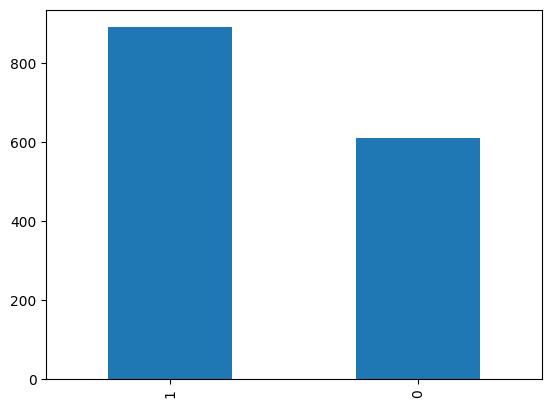

In [14]:
dataset['owned'].value_counts().plot(kind='bar')

- a. Owners (1) has the most number of observations
- b. The observations between the two categories(1 & 0) varies as (1) has more observations but the ratio is less than 2:1, therefore the observations balances across the categories.

<AxesSubplot: ylabel='Frequency'>

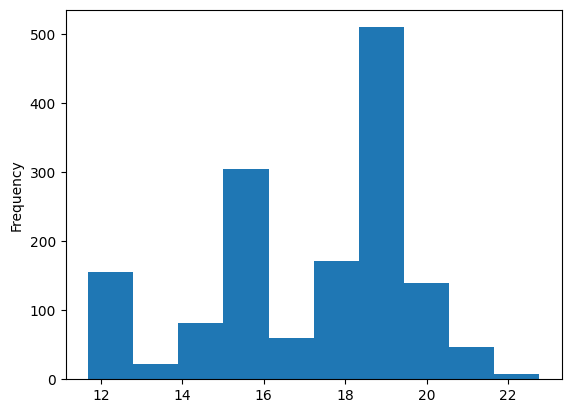

In [15]:
dataset['overall_rating'].plot(kind = 'hist')


The distribution looks almost normal but is more skewed to the left

<AxesSubplot: title={'center': 'overall_rating'}, xlabel='owned'>

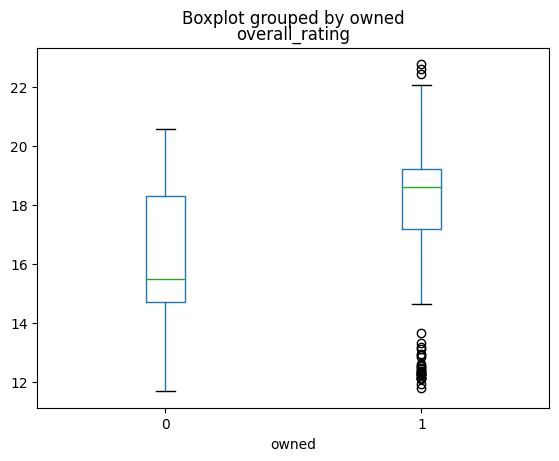

In [16]:

#dataset.boxplot(column=[0,1], by='overall_rating',grid=False)
dataset.boxplot(column=['overall_rating'], by='owned', grid=False)

From the above plot, those who owns (owners) the electric motorcycle have higher overall_rating than those that do not own one. This means that owners give more higer rating scores than those that do not own the electric motorcycle.

## Task 3

**Deciding type of machine learning problem**

Since the business wants to predict whether a review came from an owner or not, this is a classification machine learning problem.

## Task 4


**Building a Machine Learning Model**

In [17]:
# Start coding here... 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

scaler = StandardScaler()

The above are the required packages to build a prediction model for this problem;
- LogisticRegression is the model to be used.
- StandardScaler is used to standardized the features
- Train_test_split is used to split the dataset into training and testing set
- accuracy_score, precision_score, recall_score are used to check the performance of the model.

In [18]:
X = dataset.drop('owned',axis='columns')
X = pd.get_dummies(X)
y = dataset['owned']

The features in the dataset is splited into target variable(y) and predictor variable(X).

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0,stratify=y)

The dataset is splitted into training and testing subsets;
- A test size of 20% is set apart for testing purposes.
- random_state is set for reproducibility.
- stratify is set to ensure the returned training and test subsets have the same proportions of class labels as the input dataset.

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The training and test predictor variables are standardized

In [21]:
model= LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Logistic regression model is initialized and fitted to training set.
Prediction is done and result saved to 'prediction' variable.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier(18)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_kn.fit(X_train, y_train)
prediction_kn = model_kn.predict(X_test)


- KNeighboursClassifier is imported to be used as a comparison model.
- The training and test predictor variables are standardized.

## Task 5


**Why I used the above models**

- Logistic regression is easy to implement, interpret, and very efficient to train to be used as the base model.
- KNeigborsclassifier requires tunning the n_neighbors parameter at the very least to find the best score and therefore serves better as the comparsion model.
- They are both classification model
- KNeighbors is a non-parametric algorithm and there is perfect for comparison against logistic regression which is a parametric algorithm. This provide insight from both perspective with increased confidence. 

## Task 6


**Metric Scores**

In [23]:
# Start coding here...
precision_log = precision_score(prediction,y_test)
accuracy_log = accuracy_score(prediction,y_test)
recall_log = recall_score(prediction,y_test)

precision_kn = precision_score(prediction_kn,y_test)
accuracy_kn = accuracy_score(prediction_kn,y_test)
recall_kn = recall_score(prediction_kn,y_test)

Calculate the precision, accuracy and recall of both models(Logistic Regression and KNeighbors) classifiers.

In [24]:
result_dict = {
    'logistic regression':[precision_log,accuracy_log, recall_log],
    'KNeighbors':[precision_kn,accuracy_kn,recall_kn]
}
result_pandas = pd.DataFrame.from_dict(result_dict)
result_pandas.index = ['Precision','Accuracy','Recall']
result_pandas

,logistic regression,KNeighbors
Precision,0.837079,0.842697
Accuracy,0.766667,0.710000
Recall,0.784211,0.717703


Dataframe of the scores for both classifiers. This will make it easy to compare the scores easily.

## Task 7


**Key Report**

- The logistic Regression has a better accuracy(about 77%), while Kneigbors has an a max accuracy score of about 71%.
- The precision score is approximately the same.
- Since the business wants to know if a review came from an owner or not, a model with the lower false negative( this means, the model predicts most reviews from owners correctly) rate is the more important score to focus on; Recall score.
**Therefore, the logistic regression model performs better and should be deployed by the business.**

**In conclusion;**
- The owners have more observations. This indicates there are more owners than non-owners.
- The observations are balanced across both owners and non-owners. This shows the difference between the two is not more than 2:1 ratio.
- The distribution of overall ratings is almost normal with data little more skewed to the left. This shows that ratings below 20 are more frequent.
- Owners give higher scores than non-owners.
- The logistic regression model is best suited for the business in predicting if reviews are from the owners or not.
